## **03-05 펄플렉서티(Perplexity, PPL)**
---

두 개의 모델 A, B가 있을 때 이 **모델의 성능** 은 어떻게 비교할 수 있을까요? 두 개의 모델을 오타 교정, 기계 번역 등의 평가에 투입해볼 수 있겠습니다. 그리고 **두 모델이 해당 업무의 성능을 누가 더 잘했는지를 비교**하면 되겠습니다. 그런데 두 모델의 성능을 비교하고자, 일일히 모델들에 대해서 실제 작업을 시켜보고 정확도를 비교하는 작업은 공수가 너무 많이 드는 작업입니다. 만약 비교해야하는 모델이 두 개가 아니라 그 이상의 수라면 시간은 비교해야하는 모델의 수만큼 배로 늘어날 수도 있습니다.

이러한 평가보다는 어쩌면 조금은 부정확할 수는 있어도 테스트 데이터에 대해서 **빠르게 식으로 계산되는 더 간단한 평가 방법**이 있습니다. 바로 모델 내에서 자신의 성능을 수치화하여 결과를 내놓는 **펄플렉서티(perplexity)** 입니다.

---
### **1. 언어 모델의 평가 방법(Evaluation metric) : PPL**  

펄플렉서티(perplexity)는 **언어 모델을 평가하기 위한 평가 지표** 입니다. 보통 줄여서 PPL이 라고 표현합니다. 왜 perplexity라는 용어를 사용했을까요? 영어에서 `'perplexed'`는 '헷갈리는'과 유사한 의미를 가집니다. 그러니까 여기서 PPL은 **'헷갈리는 정도'** 로 이해합시다. PPL를 처음 배울때 다소 낯설게 느껴질 수 있는 점이 있다면, PPL은 수치가 높으면 좋은 성능을 의미하는 것이 아니라, **'낮을수록' 언어 모델의 성능이 좋다는 것을 의미** 한다는 점입니다.

PPL은 **문장의 길이로 정규화된 문장 확률의 역수** 입니다. 문장 $W$의 길이가 $N$이라고 하였을 때의 PPL은 다음과 같습니다.

$$PPL(W)=P(w_{1}, w_{2}, w_{3}, ... , w_{N})^{-\frac{1}{N}}=\sqrt[N]{\frac{1}{P(w_{1}, w_{2}, w_{3}, ... , w_{N})}}$$

문장의 확률에 **체인룰(chain rule)** 을 적용하면 아래와 같습니다.  
  
  $$PPL(W)=\sqrt[N]{\frac{1}{P(w_{1}, w_{2}, w_{3}, ... , w_{N})}}=\sqrt[N]{\frac{1}{\prod_{i=1}^{N}P(w_{i}| w_{1}, w_{2}, ... , w_{i-1})}}$$

여기에 n-gram을 적용해볼 수도 있습니다. 예를 들어 bigram 언어 모델의 경우에는 식이 아래와 같습니다.  
  
$$PPL(W)=\sqrt[N]{\frac{1}{\prod_{i=1}^{N}P(w_{i}| w_{i-1})}}$$

---
### **2. 분기 계수(Branching factor)**


PPL은 **선택할 수 있는 가능한 경우의 수** 를 의미하는 **분기계수(branching factor)** 입니다. PPL은 이 언어 모델이 **특정 시점에서 평균적으로 몇 개의 선택지를 가지고 고민하고 있는지** 를 의미합니다. 가령, 언어 모델에 어떤 테스트 데이터을 주고 측정했더니 `PPL이 10`이 나왔다고 해봅시다. 그렇다면 해당 언어 모델은 **테스트 데이터에 대해서 다음 단어를 예측하는 모든 시점(time step)마다 평균 10개의 단어를 가지고 어떤 것이 정답인지 고민하고 있다** 고 볼 수 있습니다. 같은 테스트 데이터에 대해서 두 언어 모델의 PPL을 각각 계산 후에 PPL의 값을 비교하면, 두 언어 모델 중 PPL이 더 낮은 언어 모델의 성능이 더 좋다고 볼 수 있습니다.
  
 
 $$PPL(W)=P(w_{1}, w_{2}, w_{3}, ... , w_{N})^{-\frac{1}{N}}=(\frac{1}{10}^{N})^{-\frac{1}{N}}=\frac{1}{10}^{-1}=10$$
 
 

단, 평가 방법에 있어서 주의할 점은 PPL의 값이 낮다는 것은 테스트 데이터 상에서 높은 정확도를 보인다는 것이지, **사람이 직접 느끼기에 좋은 언어 모델이라는 것을 반드시 의미하진 않는다** 는 점입니다. 또한 언어 모델의 PPL은 테스트 데이터에 의존하므로 두 개 이상의 언어 모델을 비교할 때는 정량적으로 양이 많고, 또한 도메인에 알맞은 동일한 테스트 데이터를 사용해야 신뢰도가 높다는 것입니다.

---
### **3. 기존 언어 모델 Vs. 인공 신경망을 이용한 언어 모델.**

페이스북 AI 연구팀은 앞서 배운 n-gram 언어 모델과 이후 배우게 될 딥 러닝을 이용한 언어 모델에 대해서 PPL로 성능 테스트를 한 표를 공개한 바 있습니다.

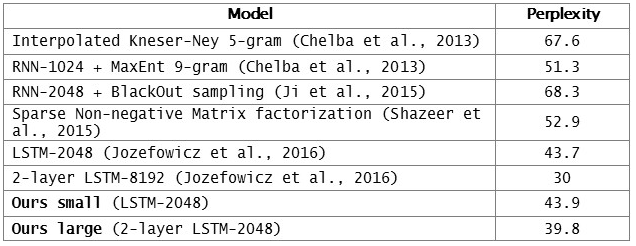  
링크 : https://engineering.fb.com/2016/10/25/ml-applications/building-an-efficient-neural-language-model-over-a-billion-words/

표에서 맨 위의 줄의 언어 모델이 n-gram을 이용한 언어 모델이며 PPL이 67.6으로 측정되었습니다. 5-gram을 사용하였으며, 5-gram 앞에 Interpolated Kneser-Ney라는 이름이 붙었는데 이 책에서는 별도 설명을 생략하겠다고 했던 일반화(generalization) 방법이 사용된 모델입니다. 반면, 그 아래의 모델들은 인공 신경망을 이용한 언어 모델들로 페이스북 AI 연구팀이 자신들의 언어 모델을 다른 언어 모델과 비교하고자 하는 목적으로 기록하였습니다. 아직 RNN과 LSTM 등이 무엇인지 배우지는 않았지만, **인공 신경망을 이용한 언어 모델들은 대부분 n-gram을 이용한 언어 모델보다 더 좋은 성능 평가를 받았음** 을 확인할 수 있습니다.

마지막 편집일시 : 2022년 11월 16일 9:37 오전